<a href="https://colab.research.google.com/github/Saharuth/MachineLearning/blob/main/logistic_regression_principle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Logistic Regression

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format='retina'

print(f"pandas  version = {pd.__version__}")
print(f"numpy   version = {np.__version__}")
print(f"seaborn version = {sns.__version__}")

pandas  version = 1.5.3
numpy   version = 1.23.5
seaborn version = 0.12.2


In [ ]:
df = pd.read_csv('https://github.com/Saharuth/MachineLearning/raw/main/study_hours.csv')
df.head()

<Axes: xlabel='Hours', ylabel='Pass'>

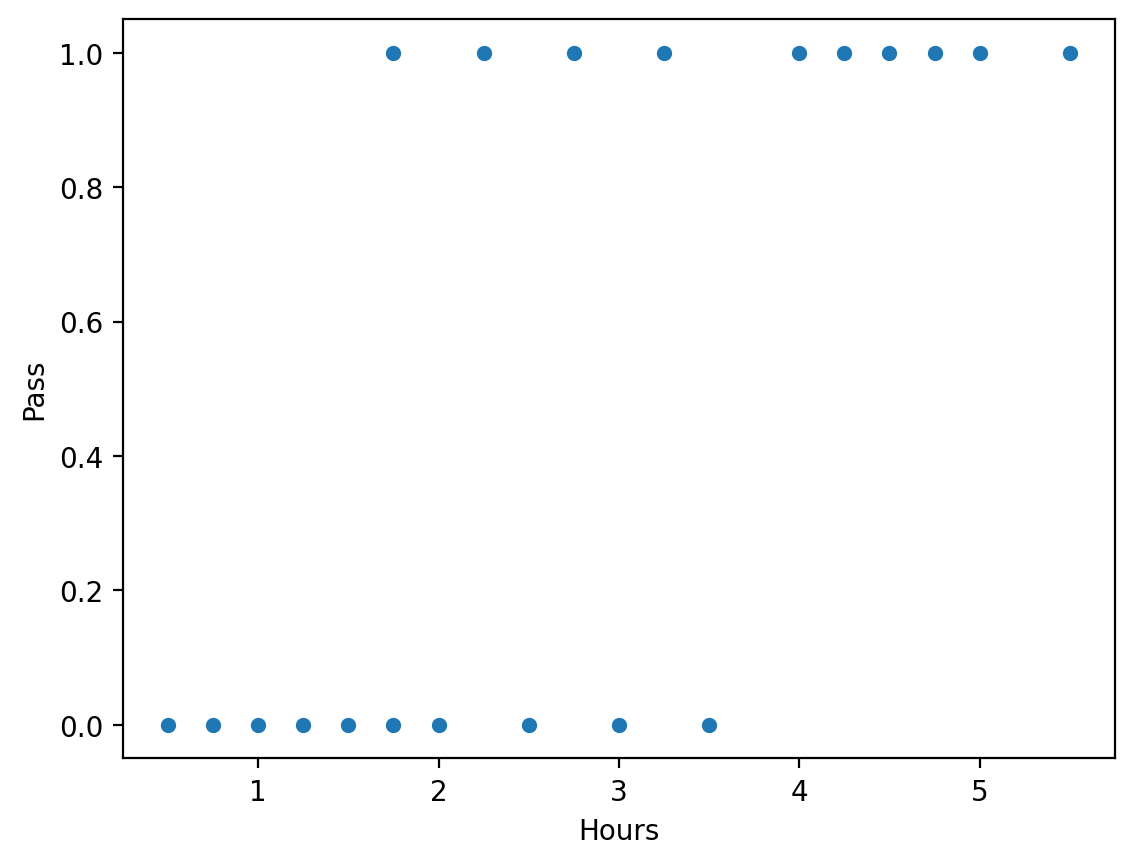

In [4]:
sns.scatterplot(data=df, x='Hours', y='Pass')

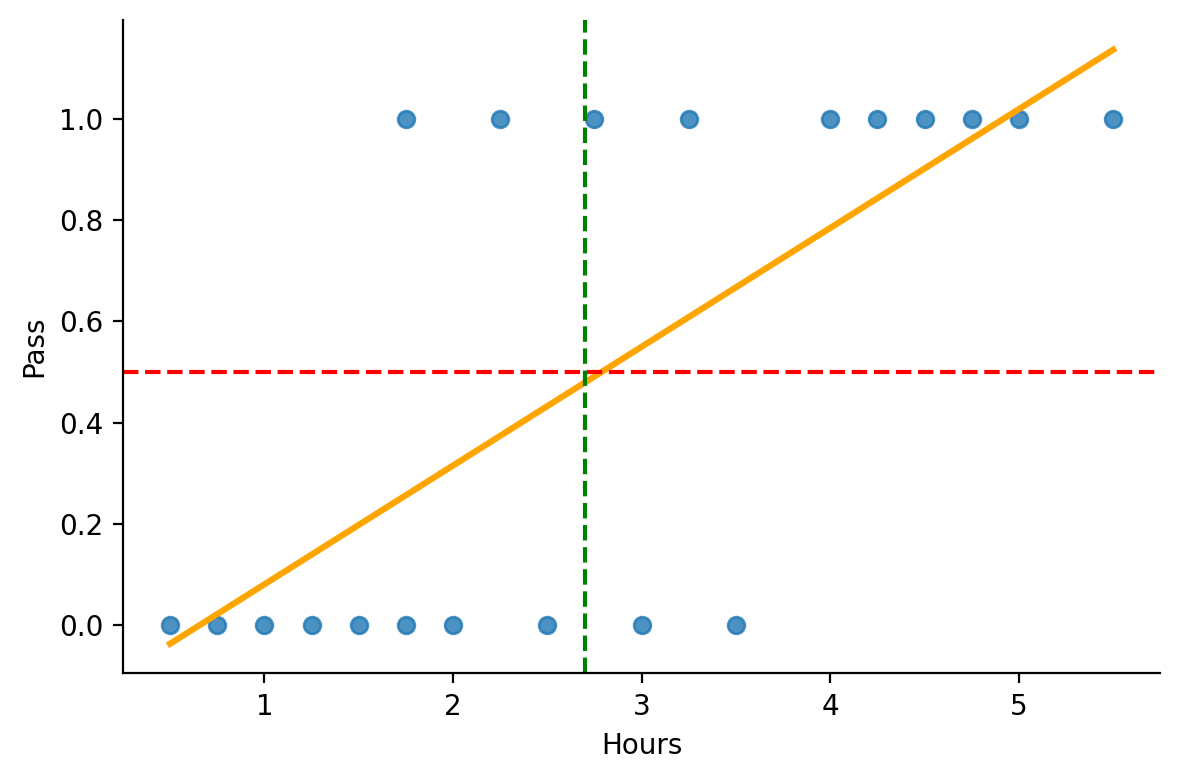

In [7]:
sns.lmplot(x='Hours', y='Pass', data=df, logistic=False, ci=None, height=4, aspect=1.5, line_kws={'color': 'orange'})
plt.axhline(.5, color='red', linestyle='--')
plt.axvline(2.7, color='green', linestyle='--')

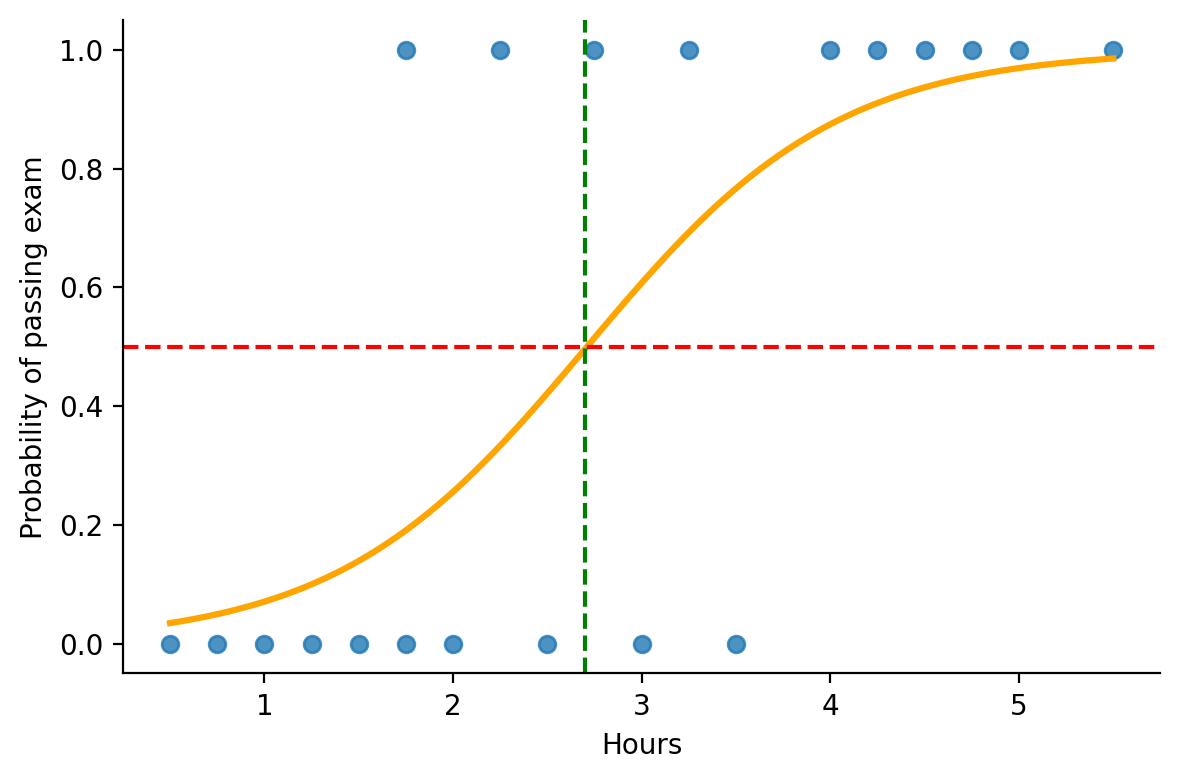

In [9]:
sns.lmplot(x='Hours', y='Pass', data=df, logistic=True, ci=None, height=4, aspect=1.5, line_kws={'color': 'orange'})
plt.ylabel('Probability of passing exam')
plt.axhline(.5, color='red', linestyle='--')
plt.axvline(2.7, color='green', linestyle='--')

###STATSMODELS

In [11]:
from patsy import dmatrices
import statsmodels.api as sm

In [12]:
y, X = dmatrices('Pass ~ Hours', data=df, return_type='dataframe') # with Intercept column
# y, X = dmatrices('Pass ~ Hours - 1', df, return_type = 'dataframe') # no Intercept column

In [13]:
X.head()

,Intercept,Hours
0,1.0,0.50
1,1.0,0.75
2,1.0,1.00
3,1.0,1.25
4,1.0,1.50


In [14]:
y.head()

,Pass
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0


###model_a (with intercept)

In [15]:
model_a = sm.Logit(y, X).fit()
model_a.summary()

Optimization terminated successfully.
         Current function value: 0.401494
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                   Pass   No. Observations:                   20
Model:                          Logit   Df Residuals:                       18
Method:                           MLE   Df Model:                            1
Date:                Fri, 15 Sep 2023   Pseudo R-squ.:                  0.4208
Time:                        08:42:06   Log-Likelihood:                -8.0299
converged:                       True   LL-Null:                       -13.863
Covariance Type:            nonrobust   LLR p-value:                 0.0006365
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -4.0777      1.761     -2.316      0.021      -7.529      -0.626
Hours          1.5046      0.629      2.393      0.017       0.272       2.737
==============================================================================
"""

In [16]:
model_a.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Method:           MLE       
Dependent Variable: Pass             Pseudo R-squared: 0.421     
Date:               2023-09-15 08:43 AIC:              20.0598   
No. Observations:   20               BIC:              22.0512   
Df Model:           1                Log-Likelihood:   -8.0299   
Df Residuals:       18               LL-Null:          -13.863   
Converged:          1.0000           LLR p-value:      0.00063648
No. Iterations:     7.0000           Scale:            1.0000    
------------------------------------------------------------------
               Coef.   Std.Err.     z     P>|z|    [0.025   0.975]
------------------------------------------------------------------
Intercept     -4.0777    1.7610  -2.3156  0.0206  -7.5292  -0.6262
Hours          1.5046    0.6287   2.3932  0.0167   0.2724   2.7369
=================================================================

"""

In [19]:
model_a.predict([ [1, 2],
                  [1, 4] ])

array([0.25570318, 0.8744475 ])

In [20]:
model_a.predict(X)

0     0.034710
1     0.049773
2     0.070892
3     0.100029
4     0.139344
5     0.190837
6     0.190837
7     0.255703
8     0.333530
9     0.421627
10    0.515011
11    0.607359
12    0.692617
13    0.766481
14    0.874448
15    0.910278
16    0.936624
17    0.955611
18    0.969097
19    0.985194
dtype: float64

In [21]:
model_a.predict(X).apply(lambda p: 0 if p < .5 else 1) # ค่าที่ทำนายมากกว่า 0.5 => 1 แต่ถ้าต่ำกว่า 0.5 => 0

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    1
11    1
12    1
13    1
14    1
15    1
16    1
17    1
18    1
19    1
dtype: int64

In [23]:
model_a.params
# model_a.params['Intercept']
# model_a.params['Hours']

Intercept   -4.077713
Hours        1.504645
dtype: float64

In [24]:
df['predicted'] = model_a.predict(X).apply(lambda p: 0 if p < .5 else 1)
df

,Hours,Pass,predicted
0,0.50,0,0
1,0.75,0,0
2,1.00,0,0
3,1.25,0,0
4,1.50,0,0
5,1.75,0,0
6,1.75,1,0
7,2.00,0,0
8,2.25,1,0
9,2.50,0,0


In [25]:
df['log_odds'] = model_a.params['Intercept'] + model_a.params['Hours'] * df['Hours']
df['odds'] = np.exp(model_a.params['Intercept'] + model_a.params['Hours'] * df['Hours'])
df['prob'] = model_a.predict(X)
df

,Hours,Pass,predicted,log_odds,odds,prob
0,0.50,0,0,-3.325391,0.035958,0.034710
1,0.75,0,0,-2.949229,0.052380,0.049773
2,1.00,0,0,-2.573068,0.076301,0.070892
3,1.25,0,0,-2.196907,0.111146,0.100029
4,1.50,0,0,-1.820745,0.161905,0.139344
5,1.75,0,0,-1.444584,0.235844,0.190837
6,1.75,1,0,-1.444584,0.235844,0.190837
7,2.00,0,0,-1.068423,0.343550,0.255703
8,2.25,1,0,-0.692261,0.500443,0.333530
9,2.50,0,0,-0.316100,0.728987,0.421627


###STATSMODELS: CONFUSION MATRIX

In [26]:
model_a.pred_table()

array([[8., 2.],
       [2., 8.]])